# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_X_1.csv")
df.head()

,userName,score,at,content
0,fairy grass,1,2024-05-06 01:04:44,dr kemarin mau login aja g bs anj
1,Ruhin Gaming,1,2024-05-06 00:26:56,"hapus aja lah ni apk gc guna,mohon maaf ya klo..."
2,Jackyhadi Jack,4,2024-05-06 00:01:12,Masih belum banyak berita viralnya yg trangkat...
3,Miguel,5,2024-05-05 23:15:19,GG gaming
4,Gregorio Jenali,1,2024-05-05 22:43:36,Sangat jelek..... Sering terjadi eror saat dir...


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,dr kemarin mau login aja g bs anj,fairy grass,2024-05-06 01:04:44
1,"hapus aja lah ni apk gc guna,mohon maaf ya klo...",Ruhin Gaming,2024-05-06 00:26:56
2,Masih belum banyak berita viralnya yg trangkat...,Jackyhadi Jack,2024-05-06 00:01:12
3,GG gaming,Miguel,2024-05-05 23:15:19
4,Sangat jelek..... Sering terjadi eror saat dir...,Gregorio Jenali,2024-05-05 22:43:36
...,...,...,...
393,Bikin akun ribet amat nomer telfon tidak bisa ...,Khalisa Alifia Sakhi,2024-05-02 08:00:55
394,This good,Desta Pratama,2024-05-02 07:26:42
395,bokepny bagus tapi kalo login kadang susah,kaka ran,2024-05-02 07:10:44
396,"Saya baru saja login,akun di buat januari 2023...",Ailla Nohe,2024-05-02 06:48:57


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   398 non-null    object
 1   userName  398 non-null    object
 2   at        398 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,398,398,398
unique,357,397,398
top,Good,Pengguna Google,2024-05-06 01:04:44
freq,8,2,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(398, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(357, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,dr kemarin mau login aja g bs anj,fairy grass,2024-05-06 01:04:44
1,hapus aja lah ni apk gc gunamohon maaf ya klo ...,Ruhin Gaming,2024-05-06 00:26:56
2,masih belum banyak berita viralnya yg trangkat...,Jackyhadi Jack,2024-05-06 00:01:12
3,gg gaming,Miguel,2024-05-05 23:15:19
4,sangat jelek sering terjadi eror saat direfresh,Gregorio Jenali,2024-05-05 22:43:36
...,...,...,...
393,bikin akun ribet amat nomer telfon tidak bisa ...,Khalisa Alifia Sakhi,2024-05-02 08:00:55
394,this good,Desta Pratama,2024-05-02 07:26:42
395,bokepny bagus tapi kalo login kadang susah,kaka ran,2024-05-02 07:10:44
396,saya baru saja loginakun di buat januari 2023 ...,Ailla Nohe,2024-05-02 06:48:57


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,dr kemarin mau login aja g bs anj,fairy grass,2024-05-06 01:04:44
1,hapus aja lah ni aplikasi gc gunamohon maaf ya...,Ruhin Gaming,2024-05-06 00:26:56
2,masih belum banyak berita viralnya yang trangk...,Jackyhadi Jack,2024-05-06 00:01:12
3,gg gaming,Miguel,2024-05-05 23:15:19
4,sangat jelek sering terjadi eror saat direfresh,Gregorio Jenali,2024-05-05 22:43:36
...,...,...,...
393,bikin akun ribet amat nomer telfon tidak bisa ...,Khalisa Alifia Sakhi,2024-05-02 08:00:55
394,this good,Desta Pratama,2024-05-02 07:26:42
395,bokepny bagus tapi kalo login kadang susah,kaka ran,2024-05-02 07:10:44
396,saya baru saja loginakun di buat januari 2023 ...,Ailla Nohe,2024-05-02 06:48:57


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,dr kemarin mau login aja g bs anj,fairy grass,2024-05-06 01:04:44
1,hapus aja lah ni aplikasi gc gunamohon maaf ka...,Ruhin Gaming,2024-05-06 00:26:56
2,belum banyak berita viralnya trangkat harus le...,Jackyhadi Jack,2024-05-06 00:01:12
3,gg gaming,Miguel,2024-05-05 23:15:19
4,sangat jelek sering terjadi eror direfresh,Gregorio Jenali,2024-05-05 22:43:36
...,...,...,...
393,bikin akun ribet nomer telfon bisa digunakan k...,Khalisa Alifia Sakhi,2024-05-02 08:00:55
394,this good,Desta Pratama,2024-05-02 07:26:42
395,bokepny bagus kalo login kadang susah,kaka ran,2024-05-02 07:10:44
396,baru loginakun buat januari 2023 hr ni coba lo...,Ailla Nohe,2024-05-02 06:48:57


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0             [dr, kemarin, mau, login, aja, g, bs, anj]
1      [hapus, aja, lah, ni, aplikasi, gc, gunamohon,...
2      [belum, banyak, berita, viralnya, trangkat, ha...
3                                           [gg, gaming]
4      [sangat, jelek, sering, terjadi, eror, direfresh]
                             ...                        
393    [bikin, akun, ribet, nomer, telfon, bisa, digu...
394                                         [this, good]
395         [bokepny, bagus, kalo, login, kadang, susah]
396    [baru, loginakun, buat, januari, 2023, hr, ni,...
397    [jelek, susah, login, jelek, sangat, kalau, ni...
Name: content, Length: 357, dtype: object

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_X_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_X_1.csv', encoding = 'latin1')
df_clean

,content
0,dr kemarin mau login aja g bs anj
1,hapus aja lah ni aplikasi gc gunamohon maaf ka...
2,belum banyak berita viralnya trangkat harus le...
3,gg gaming
4,sangat jelek sering jadi eror direfresh
...,...
352,bikin akun ribet nomer telfon bisa guna kaga a...
353,this good
354,bokepny bagus kalo login kadang susah
355,baru loginakun buat januari 2023 hr ni coba lo...


# **Translate**

In [21]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_X_1.csv', encoding='latin1')

In [24]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 7.74MB/s]                   


In [26]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,dr kemarin mau login aja g bs anj
1,hapus aja lah ni aplikasi gc gunamohon maaf ka...
2,belum banyak berita viralnya trangkat harus le...
3,gg gaming
4,sangat jelek sering jadi eror direfresh
...,...
352,bikin akun ribet nomer telfon bisa guna kaga a...
353,this good
354,bokepny bagus kalo login kadang susah
355,baru loginakun buat januari 2023 hr ni coba lo...


In [27]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_X_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_X_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,dr kemarin mau login aja g bs anj,You can't just log in yesterday.
1,1,hapus aja lah ni aplikasi gc gunamohon maaf ka...,Please delete this gc application to apologize...
2,2,belum banyak berita viralnya trangkat harus le...,There's not much viral news yet. It's got to b...
3,3,gg gaming,gg gaming
4,4,sangat jelek sering jadi eror direfresh,It's so ugly. It's often the err diresh.
...,...,...,...
352,352,bikin akun ribet nomer telfon bisa guna kaga a...,Make a complicated account. Phone numbers can ...
353,353,this good,this good
354,354,bokepny bagus kalo login kadang susah,It's good to log in. It's hard sometimes.
355,355,baru loginakun buat januari 2023 hr ni coba lo...,Just login to January 2023. Try login immediat...


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_X_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,dr kemarin mau login aja g bs anj,You can't just log in yesterday.
1,1,hapus aja lah ni aplikasi gc gunamohon maaf ka...,Please delete this gc application to apologize...
2,2,belum banyak berita viralnya trangkat harus le...,There's not much viral news yet. It's got to b...
3,3,gg gaming,gg gaming
4,4,sangat jelek sering jadi eror direfresh,It's so ugly. It's often the err diresh.
...,...,...,...
352,352,bikin akun ribet nomer telfon bisa guna kaga a...,Make a complicated account. Phone numbers can ...
353,353,this good,this good
354,354,bokepny bagus kalo login kadang susah,It's good to log in. It's hard sometimes.
355,355,baru loginakun buat januari 2023 hr ni coba lo...,Just login to January 2023. Try login immediat...


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 139
Netral = 127
Negatif = 91

Total Data Seluruhnya : 357


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,dr kemarin mau login aja g bs anj,You can't just log in yesterday.,Netral
1,1,hapus aja lah ni aplikasi gc gunamohon maaf ka...,Please delete this gc application to apologize...,Netral
2,2,belum banyak berita viralnya trangkat harus le...,There's not much viral news yet. It's got to b...,Positif
3,3,gg gaming,gg gaming,Netral
4,4,sangat jelek sering jadi eror direfresh,It's so ugly. It's often the err diresh.,Negatif
...,...,...,...,...
352,352,bikin akun ribet nomer telfon bisa guna kaga a...,Make a complicated account. Phone numbers can ...,Negatif
353,353,this good,this good,Positif
354,354,bokepny bagus kalo login kadang susah,It's good to log in. It's hard sometimes.,Positif
355,355,baru loginakun buat januari 2023 hr ni coba lo...,Just login to January 2023. Try login immediat...,Negatif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,dr kemarin mau login aja g bs anj,You can't just log in yesterday.,Netral
1,hapus aja lah ni aplikasi gc gunamohon maaf ka...,Please delete this gc application to apologize...,Netral
2,belum banyak berita viralnya trangkat harus le...,There's not much viral news yet. It's got to b...,Positif
3,gg gaming,gg gaming,Netral
4,sangat jelek sering jadi eror direfresh,It's so ugly. It's often the err diresh.,Negatif
...,...,...,...
352,bikin akun ribet nomer telfon bisa guna kaga a...,Make a complicated account. Phone numbers can ...,Negatif
353,this good,this good,Positif
354,bokepny bagus kalo login kadang susah,It's good to log in. It's hard sometimes.,Positif
355,baru loginakun buat januari 2023 hr ni coba lo...,Just login to January 2023. Try login immediat...,Negatif


# **Visualisasi**


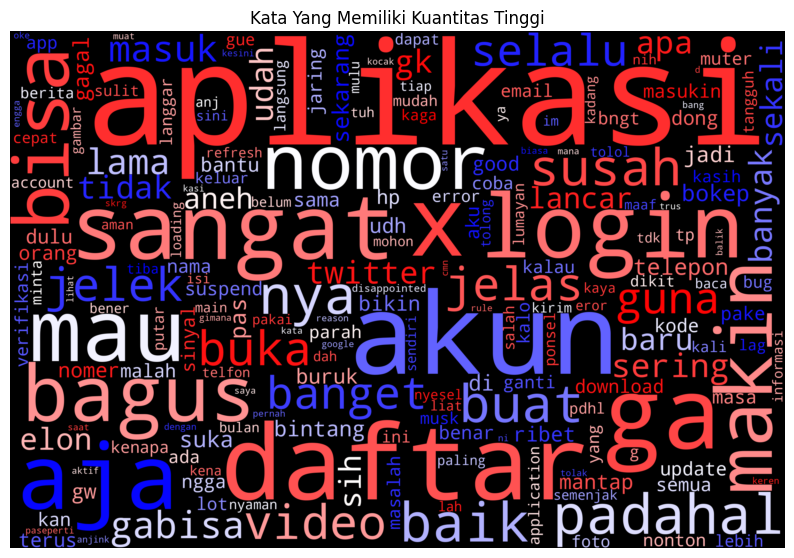

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


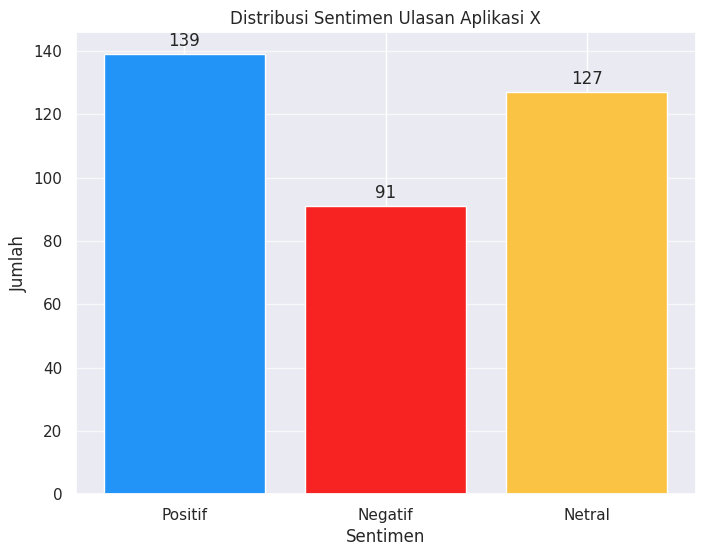

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi X")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
2,belum banyak berita viralnya trangkat harus le...,There's not much viral news yet. It's got to b...,Positif
4,sangat jelek sering jadi eror direfresh,It's so ugly. It's often the err diresh.,Negatif
5,bagus,Good.,Positif
7,tidak daftar selalu gagal verifikasi no hp pad...,No list always fails to verify phone number ev...,Negatif
8,lama2 aplikasi nya bosan video foto lagu lag,It's been a long time since his application go...,Negatif
...,...,...,...
352,bikin akun ribet nomer telfon bisa guna kaga a...,Make a complicated account. Phone numbers can ...,Negatif
353,this good,this good,Positif
354,bokepny bagus kalo login kadang susah,It's good to log in. It's hard sometimes.,Positif
355,baru loginakun buat januari 2023 hr ni coba lo...,Just login to January 2023. Try login immediat...,Negatif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
2,belum banyak berita viralnya trangkat harus le...,There's not much viral news yet. It's got to b...,1
4,sangat jelek sering jadi eror direfresh,It's so ugly. It's often the err diresh.,0
5,bagus,Good.,1
7,tidak daftar selalu gagal verifikasi no hp pad...,No list always fails to verify phone number ev...,0
8,lama2 aplikasi nya bosan video foto lagu lag,It's been a long time since his application go...,0
...,...,...,...
352,bikin akun ribet nomer telfon bisa guna kaga a...,Make a complicated account. Phone numbers can ...,0
353,this good,this good,1
354,bokepny bagus kalo login kadang susah,It's good to log in. It's hard sometimes.,1
355,baru loginakun buat januari 2023 hr ni coba lo...,Just login to January 2023. Try login immediat...,0


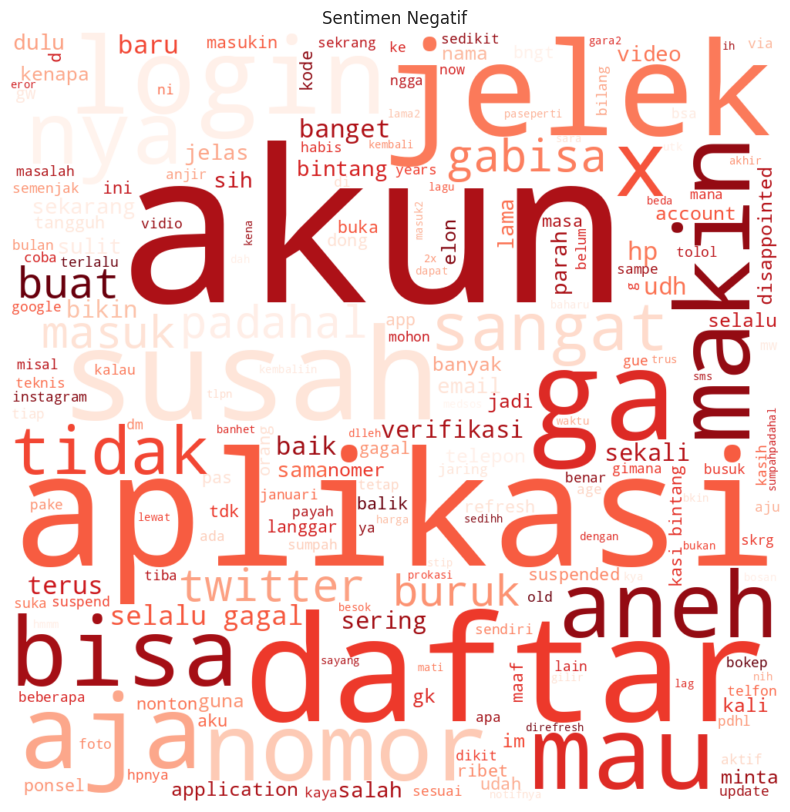

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

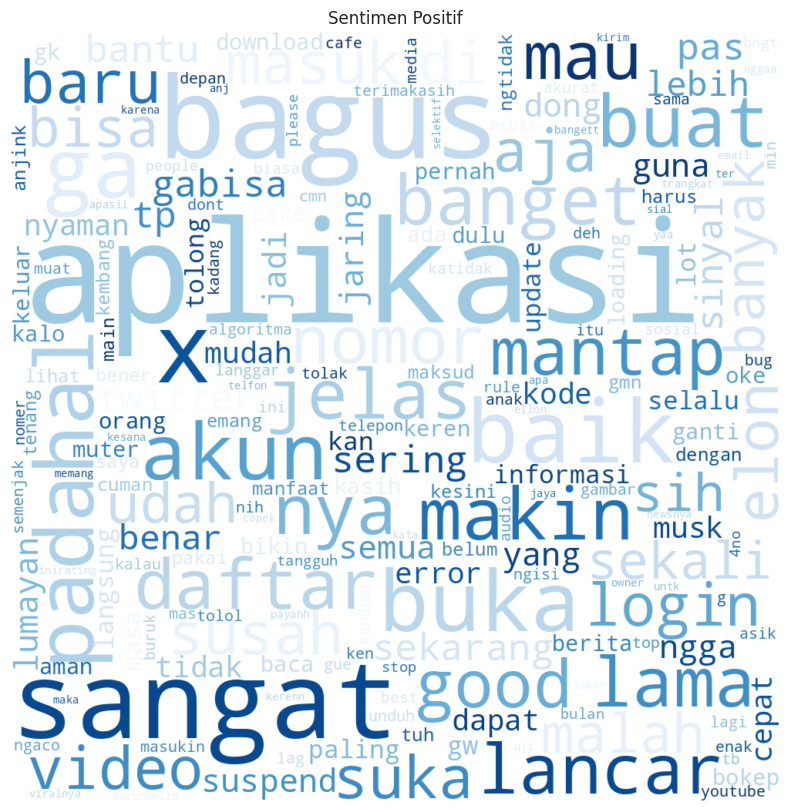

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    139
0     91
Name: count, dtype: int64

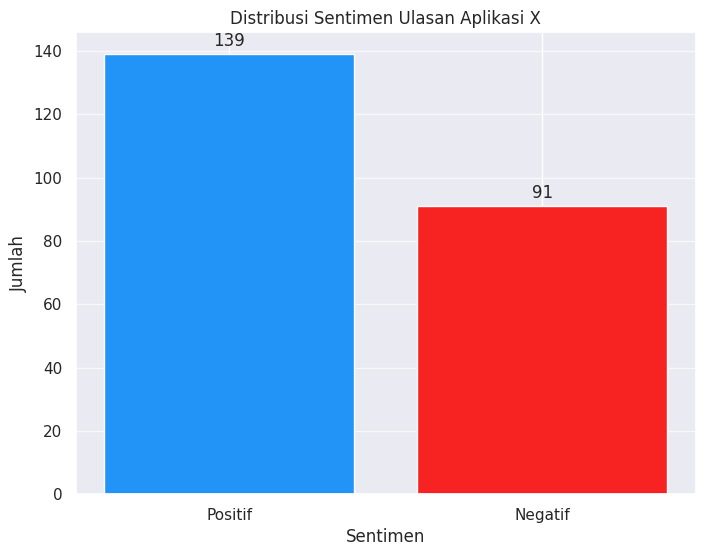

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi X")

# **Data Preparation**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [46]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

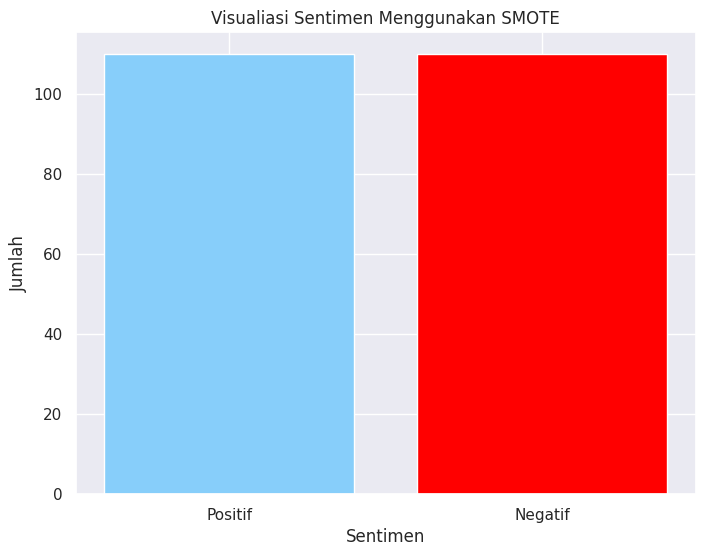

In [47]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [48]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [49]:
y_pred = naive_bayes.predict(X_test_vec)

In [50]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.6521739130434783

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.53      0.53      0.53        17
     Positif       0.72      0.72      0.72        29

    accuracy                           0.65        46
   macro avg       0.63      0.63      0.63        46
weighted avg       0.65      0.65      0.65        46



In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 9  8]
 [ 8 21]]

True Positives (TP) =  9

True Negatives (TN) =  21

False Positives (FP) =  8

False Negatives (FN) =  8

Accuracy =  0.6521739130434783


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

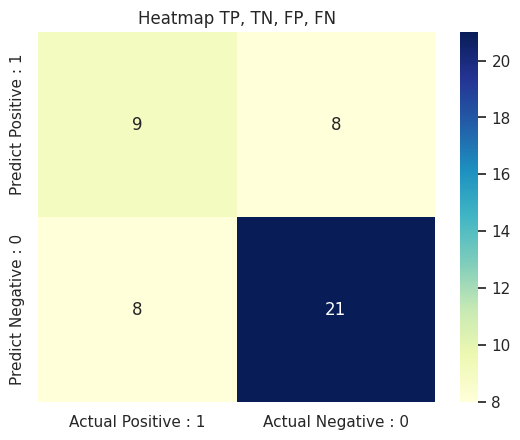

In [62]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [63]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [65]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6522


In [66]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3478


# **Testing**


In [51]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : daftarnya susah bgt
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [52]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus mudah untuk mendapat informasi
Hasil Analisis Sentimen Untuk Teks Baru : Positif
